# Binary Classification Algorithms

## Load data

In [22]:
import pandas as pd
import os
os.chdir('/workspaces/credit-card-eligibility/')

from lib.data_load import split_train_validation_data, split_train_test, plot_target_variable

In [21]:
%load_ext autoreload
%autoreload 2

In [24]:
data = pd.read_csv('notebooks/dataset.csv')
data.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [26]:
train_df, validation_df = split_train_validation_data(
    data=data,
    id_column = 'ID'
)

In [27]:
print(f"""Shape of training data: {train_df.shape}
Shape of validation data: {validation_df.shape}
""")

Shape of training data: (7767, 20)
Shape of validation data: (1942, 20)



In [30]:
x_train, x_test, y_train, y_test = split_train_test(
    train_df=train_df,
    excluded_columns=['ID', 'Target'],
    target_column='Target',
    test_size=0.2,
)

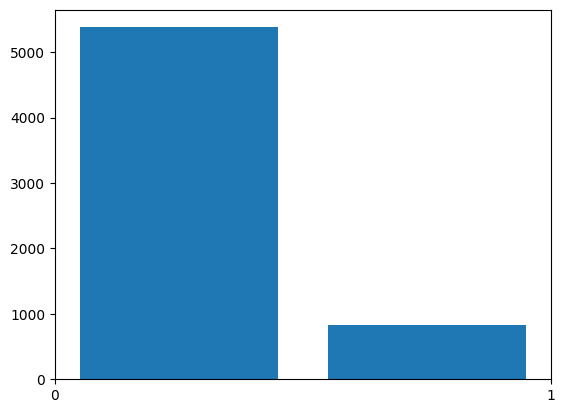

In [31]:
plot_target_variable(y_train=y_train, n_class=2, tick_labels=[0,1])

## Feature Preprocessing

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.metrics import classification_report, roc_auc_score

In [9]:
numerical_columns = ['Num_children', 'Num_family', 'Account_length', 'Total_income', 'Age', 'Years_employed']
categorical_columns = ['Income_type', 'Family_status', 'Housing_type', 'Occupation_type'] 
ordinal_columns = ['Education_type']
education_order = ['Lower secondary', 'Secondary / secondary special', 'Academic degree', 'Incomplete higher', 'Higher education']

In [10]:
# Create a pipeline that preprocess the data by data types

numerical_transformer = Pipeline(
    steps=[
        ('normalization', MinMaxScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ('ohe', OneHotEncoder())
    ]
)

ordinal_transformer = Pipeline(
    steps=[
        ('oe', OrdinalEncoder(categories=[np.array(education_order)]))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_columns),
        ('categorical', categorical_transformer, categorical_columns),
        ('ordinal', ordinal_transformer, ordinal_columns)
    ]
)

pipe = Pipeline(
    steps=[
        ('preprocessing', preprocessor)
    ]
)

In [11]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('normalization',
                                                                   MinMaxScaler())]),
                                                  ['Num_children', 'Num_family',
                                                   'Account_length',
                                                   'Total_income', 'Age',
                                                   'Years_employed']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Income_type',
                                                   'Family_status',
                                                   'Housing_type',
                                                   'Occupation_type']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder(categories=[array(['Lower secondary', 'Secondary / secondary special',
       'Academic degree', 'Incomplete higher', 'Higher education'],
      dtype='<U29')]))]),
                                                  ['Education_type'])]))])

In [12]:
pipe.fit_transform(x_train, y_train).toarray()

array([[0.        , 0.05263158, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.58333333, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.16666667, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.25      , ..., 0.        , 0.        ,
        4.        ],
       [0.        , 0.05263158, 0.36666667, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.05263158, 0.16666667, ..., 0.        , 0.        ,
        1.        ]])

## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imb_pipeline

### Logistic Regression without Resampling

In [14]:
logreg_pipe = Pipeline(
    steps=[
        ('preprocessing', preprocessor),
        ('logreg', LogisticRegression())
    ]
)
logreg_pipe.fit(x_train, y_train)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('normalization',
                                                                   MinMaxScaler())]),
                                                  ['Num_children', 'Num_family',
                                                   'Account_length',
                                                   'Total_income', 'Age',
                                                   'Years_employed']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Income_type',
                                                   'Family_status',
                                                   'Housing_type',
                                                   'Occupation_type']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder(categories=[array(['Lower secondary', 'Secondary / secondary special',
       'Academic degree', 'Incomplete higher', 'Higher education'],
      dtype='<U29')]))]),
                                                  ['Education_type'])])),
                ('logreg', LogisticRegression())])

In [15]:
y_pred = logreg_pipe.predict(x_test)
print(classification_report(y_test, y_pred))
print(f"ROC AUC score: {roc_auc_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1333
           1       0.00      0.00      0.00       221

    accuracy                           0.86      1554
   macro avg       0.43      0.50      0.46      1554
weighted avg       0.74      0.86      0.79      1554

ROC AUC score: 0.5


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


We can see that due to the imbalance of the target in the data, the model doesn't predict any value of 1 for the target variable.

Now we will try running Logistic Regression on resampled data. Resampling techniques include:
- Random Under Sampling
- Random Over Sampling
- SMOTE (over sampling)

### Random Under Sampling

In [60]:
logreg_rus_pipe = imb_pipeline(
    steps=[
        ('preprocessing', preprocessor),
        ('rus', RandomUnderSampler(random_state=24, sampling_strategy='not minority', replacement=False)),
        ('logreg', LogisticRegression())
    ]
)
logreg_rus_pipe.fit(x_train, y_train)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('normalization',
                                                                   MinMaxScaler())]),
                                                  ['Num_children', 'Num_family',
                                                   'Account_length',
                                                   'Total_income', 'Age',
                                                   'Years_employed']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Income_type',
                                                   'Family_status',
                                                   'Housing_type',
                                                   'Occupation_type']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder(categories=[array(['Lower secondary', 'Secondary / secondary special',
       'Academic degree', 'Incomplete higher', 'Higher education'],
      dtype='<U29')]))]),
                                                  ['Education_type'])])),
                ('rus',
                 RandomUnderSampler(random_state=24,
                                    sampling_strategy='not minority')),
                ('logreg', LogisticRegression())])

In [61]:
y_pred = logreg_rus_pipe.predict(x_test)
print(classification_report(y_test, y_pred))
print(f"ROC AUC score: {roc_auc_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.86      0.53      0.66      1333
           1       0.15      0.50      0.23       221

    accuracy                           0.53      1554
   macro avg       0.51      0.51      0.44      1554
weighted avg       0.76      0.53      0.60      1554

ROC AUC score: 0.5136849823315558


### Random Over Sampling

In [42]:
from imblearn.over_sampling import RandomOverSampler

In [55]:
logreg_ros_pipe = imb_pipeline(
    steps=[
        ('preprocessing', preprocessor),
        ('ros', RandomOverSampler(random_state=34, sampling_strategy='not majority')),
        ('logreg', LogisticRegression())
    ]
)

In [56]:
logreg_ros_pipe.fit(x_train, y_train)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('normalization',
                                                                   MinMaxScaler())]),
                                                  ['Num_children', 'Num_family',
                                                   'Account_length',
                                                   'Total_income', 'Age',
                                                   'Years_employed']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Income_type',
                                                   'Family_status',
                                                   'Housing_type',
                                                   'Occupation_type']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder(categories=[array(['Lower secondary', 'Secondary / secondary special',
       'Academic degree', 'Incomplete higher', 'Higher education'],
      dtype='<U29')]))]),
                                                  ['Education_type'])])),
                ('ros',
                 RandomOverSampler(random_state=34,
                                   sampling_strategy='not majority')),
                ('logreg', LogisticRegression())])

In [57]:
y_pred = logreg_ros_pipe.predict(x_test)

In [58]:
print(classification_report(y_test, y_pred))
print(f"ROC AUC score: {roc_auc_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.87      0.54      0.67      1333
           1       0.15      0.50      0.24       221

    accuracy                           0.54      1554
   macro avg       0.51      0.52      0.45      1554
weighted avg       0.77      0.54      0.61      1554

ROC AUC score: 0.5226991136924503


### Oversampling using SMOTE

In [35]:
from imblearn.over_sampling import SMOTE

In [49]:
logreg_smote_pipe = imb_pipeline(
    steps=[
        ('preprocessing', preprocessor),
        ('smote', SMOTE(random_state=44, sampling_strategy='not majority')),
        ('logreg', LogisticRegression())
    ]
)

logreg_smote_pipe.fit(x_train, y_train)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('normalization',
                                                                   MinMaxScaler())]),
                                                  ['Num_children', 'Num_family',
                                                   'Account_length',
                                                   'Total_income', 'Age',
                                                   'Years_employed']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Income_type',
                                                   'Family_status',
                                                   'Housing_type',
                                                   'Occupation_type']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder(categories=[array(['Lower secondary', 'Secondary / secondary special',
       'Academic degree', 'Incomplete higher', 'Higher education'],
      dtype='<U29')]))]),
                                                  ['Education_type'])])),
                ('ros',
                 SMOTE(random_state=44, sampling_strategy='not majority')),
                ('logreg', LogisticRegression())])

In [54]:
y_pred = logreg_smote_pipe.predict(x_test)
print(classification_report(y_test, y_pred))
print(f"ROC AUC score: {roc_auc_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.87      0.53      0.66      1333
           1       0.16      0.53      0.24       221

    accuracy                           0.53      1554
   macro avg       0.51      0.53      0.45      1554
weighted avg       0.77      0.53      0.60      1554

ROC AUC score: 0.5287718988570672


## KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

### KNN without resampling

In [32]:
knn_pipe = Pipeline(
    steps=[
        ('preprocessing', preprocessor),
        ('knn', KNeighborsClassifier())
    ]
)
knn_pipe.fit(x_train, y_train)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('normalization',
                                                                   MinMaxScaler())]),
                                                  ['Num_children', 'Num_family',
                                                   'Account_length',
                                                   'Total_income', 'Age',
                                                   'Years_employed']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Income_type',
                                                   'Family_status',
                                                   'Housing_type',
                                                   'Occupation_type']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder(categories=[array(['Lower secondary', 'Secondary / secondary special',
       'Academic degree', 'Incomplete higher', 'Higher education'],
      dtype='<U29')]))]),
                                                  ['Education_type'])])),
                ('knn', KNeighborsClassifier())])

In [33]:
y_pred = knn_pipe.predict(x_test)
print(classification_report(y_test, y_pred))
print(f"ROC AUC score: {roc_auc_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1333
           1       0.07      0.01      0.02       221

    accuracy                           0.84      1554
   macro avg       0.46      0.49      0.47      1554
weighted avg       0.74      0.84      0.79      1554

ROC AUC score: 0.4947724487683007


### KNN with SMOTE

In [37]:
knn_smote_pipe = imb_pipeline(
    steps=[
        ('preprocessing', preprocessor),
        ('smote', SMOTE(random_state=44, sampling_strategy='not majority')),
        ('knn', KNeighborsClassifier())
    ]
)
knn_smote_pipe.fit(x_train, y_train)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('normalization',
                                                                   MinMaxScaler())]),
                                                  ['Num_children', 'Num_family',
                                                   'Account_length',
                                                   'Total_income', 'Age',
                                                   'Years_employed']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Income_type',
                                                   'Family_status',
                                                   'Housing_type',
                                                   'Occupation_type']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder(categories=[array(['Lower secondary', 'Secondary / secondary special',
       'Academic degree', 'Incomplete higher', 'Higher education'],
      dtype='<U29')]))]),
                                                  ['Education_type'])])),
                ('smote',
                 SMOTE(random_state=44, sampling_strategy='not majority')),
                ('knn', KNeighborsClassifier())])

In [38]:
y_pred = knn_smote_pipe.predict(x_test)
print(classification_report(y_test, y_pred))
print(f"ROC AUC score: {roc_auc_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.86      0.64      0.73      1333
           1       0.14      0.37      0.21       221

    accuracy                           0.60      1554
   macro avg       0.50      0.50      0.47      1554
weighted avg       0.76      0.60      0.66      1554

ROC AUC score: 0.5024627197523363


### KNN with Random Under Sampling

In [39]:
knn_rus_pipe = imb_pipeline(
    steps=[
        ('preprocessing', preprocessor),
        ('rus', RandomUnderSampler(random_state=24, sampling_strategy='not minority', replacement=False)),
        ('knn', KNeighborsClassifier())
    ]
)
knn_rus_pipe.fit(x_train, y_train)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('normalization',
                                                                   MinMaxScaler())]),
                                                  ['Num_children', 'Num_family',
                                                   'Account_length',
                                                   'Total_income', 'Age',
                                                   'Years_employed']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Income_type',
                                                   'Family_status',
                                                   'Housing_type',
                                                   'Occupation_type']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder(categories=[array(['Lower secondary', 'Secondary / secondary special',
       'Academic degree', 'Incomplete higher', 'Higher education'],
      dtype='<U29')]))]),
                                                  ['Education_type'])])),
                ('rus',
                 RandomUnderSampler(random_state=24,
                                    sampling_strategy='not minority')),
                ('knn', KNeighborsClassifier())])

In [40]:
y_pred = knn_rus_pipe.predict(x_test)
print(classification_report(y_test, y_pred))
print(f"ROC AUC score: {roc_auc_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.86      0.51      0.64      1333
           1       0.14      0.49      0.22       221

    accuracy                           0.50      1554
   macro avg       0.50      0.50      0.43      1554
weighted avg       0.75      0.50      0.58      1554

ROC AUC score: 0.49753218847698355
